# Exploratory Analysis Notebook

This notebook loads a DEM raster, applies a simple preprocessing step to mask zero values, and visualizes the result. Use the first cells to load the data, then run the preprocessing and plotting cells to inspect the DEM.

In [20]:
import sys
sys.path.insert(0, '../')

import importlib
import src.dem_processing
importlib.reload(src.dem_processing)

from src.dem_processing import load_dem

In [21]:
# Load DEM data
dem, metadata = load_dem('../data/raw/raster/DEM2.tif')
print(f"DEM shape: {dem.shape}")
print(f"DEM metadata: {metadata}")


DEM shape: (2596, 2821)
DEM metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 2821, 'height': 2596, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.0002777777777777787, 0.0, 32.497083333333336,
       0.0, -0.0002777777777777781, 16.33513888888889)}


In [24]:
# Preprocess: mask zero values
import numpy as np

# Treat 0 as NoData for visualization
nodata_value = 0
dem_masked = np.where(dem == nodata_value, np.nan, dem)

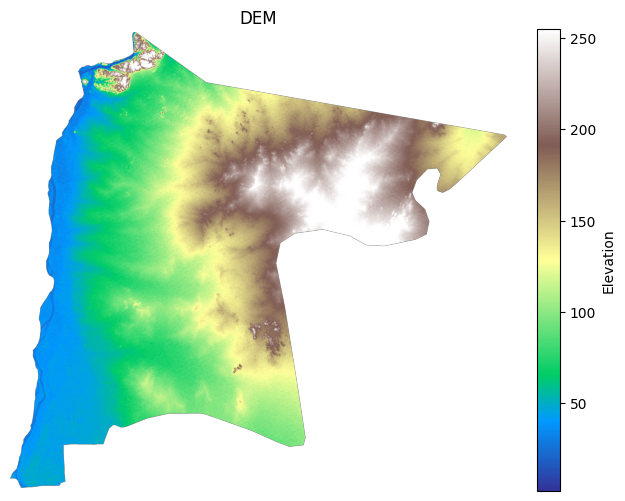

In [26]:
# Plot DEM
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(dem_masked, cmap="terrain")
plt.colorbar(label="Elevation")
plt.title("DEM")
plt.axis("off")
plt.show()

In [ ]:
# Flood Exposure Geospatial Pipeline - Exploratory Analysis

This notebook demonstrates the key features of the flood exposure geospatial pipeline.

## Setup

```python
import sys
sys.path.insert(0, '../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from src.dem_processing import load_dem

%matplotlib inline
```

## 1. Load Sample Data

```python
# Example: Load flood depth raster
# flood_depth, metadata = load_raster.read_geotiff("../data/raw/raster/flood_depth.tif")
# print(f"Raster shape: {flood_depth.shape}")
# print(f"CRS: {metadata['crs']}")
```

## 2. Load Administrative Boundaries

```python
# Example: Load vector boundaries
# boundaries = load_vector.read_shapefile("../data/raw/vector/boundaries.shp")
# print(f"Number of features: {len(boundaries)}")
# print(f"CRS: {boundaries.crs}")
```

## 3. Preprocessing

```python
# Example: Reproject and clip raster
# Ensure boundary and raster have same CRS
# if boundaries.crs != metadata['crs']:
#     boundaries = boundaries.to_crs(metadata['crs'])
```

## 4. Zonal Statistics

```python
# Example: Calculate zonal statistics
# stats = zonal_statistics.compute_zonal_statistics(
#     "../data/raw/raster/flood_depth.tif",
#     boundaries,
#     stats=['min', 'max', 'mean', 'sum']
# )
# print(stats.head())
```

## 5. Exposure Analysis

```python
# Example: Calculate affected population
# population = np.random.rand(100, 100) * 1000  # Dummy population data
# flood_depth_array = np.random.rand(100, 100) * 3  # Dummy flood data
# 
# impact = exposure_metrics.calculate_affected_population(
#     flood_depth_array,
#     population,
#     depth_threshold=0.5
# )
# print(f"Affected population: {impact['total_affected']:.0f}")
# print(f"Percentage affected: {impact['percent_affected']:.2f}%")
```

## 6. Visualization

```python
# Example: Plot flood depth map
# fig = maps.plot_raster(
#     flood_depth[0],
#     title="Flood Depth (m)",
#     cmap="Blues",
#     colorbar_label="Depth (m)"
# )
# plt.show()
```

## 7. Time Series Analysis

```python
# Example: Analyze temporal trends
# from src.analysis import time_series
# 
# # Load multiple time steps
# file_paths = ["../data/raw/raster/flood_t1.tif", "../data/raw/raster/flood_t2.tif"]
# ts_data = time_series.load_time_series_rasters(file_paths)
# 
# # Calculate temporal statistics
# temporal_stats = time_series.calculate_temporal_statistics(ts_data)
```

## 8. Tensor Operations

```python
# Example: Use PyTorch for raster processing
# from src.tensors import pytorch_ops
# 
# # Apply convolution
# kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9.0
# smoothed = pytorch_ops.raster_convolution(flood_depth[0], kernel)
```

## 9. Data Cubes

```python
# Example: Create and analyze data cubes
# from src.cubes import xarray_cube
# 
# # Create datacube
# cube = xarray_cube.create_datacube_from_rasters(file_paths)
# 
# # Aggregate temporally
# monthly_mean = xarray_cube.aggregate_datacube_temporal(cube, freq='M', method='mean')
```

## Conclusion

This notebook demonstrates the basic workflow for flood exposure analysis using the geospatial pipeline. Customize and extend these examples for your specific use case.

## Next Steps

1. Load your own data
2. Adjust preprocessing parameters
3. Calculate exposure metrics for your region
4. Generate publication-ready visualizations
5. Export results for further analysis